In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read .xlsx file using pandas

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'ProblemCData.xlsx')
seseds = pd.read_excel(data_path, sheet_name='seseds')
msncodes = pd.read_excel(data_path, sheet_name='msncodes')

In [3]:
seseds.head(5)

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.0
1,ABICB,AZ,1961,0.0
2,ABICB,AZ,1962,0.0
3,ABICB,AZ,1963,0.0
4,ABICB,AZ,1964,0.0


In [5]:
seseds.isnull().sum()

MSN          0
StateCode    0
Year         0
Data         0
dtype: int64

In [4]:
seseds.describe()

,Year,Data
count,105744.000000,1.057440e+05
mean,1986.529846,1.480125e+05
std,13.576094,7.385164e+05
min,1960.000000,-2.991821e+05
25%,1975.000000,2.400450e+00
50%,1987.000000,2.113614e+02
75%,1998.000000,1.602248e+04
max,2009.000000,1.740157e+07


In [5]:
msncodes.head(10)

,MSN,Description,Unit
0,ABICB,Aviation gasoline blending components consumed...,Billion Btu
1,ABICP,Aviation gasoline blending components consumed...,Thousand barrels
2,ARICB,Asphalt and road oil consumed by the industria...,Billion Btu
3,ARICD,Asphalt and road oil price in the industrial s...,Dollars per million Btu
4,ARICP,Asphalt and road oil consumed by the industria...,Thousand barrels
5,ARICV,Asphalt and road oil expenditures in the indus...,Million dollars
6,ARTCB,Asphalt and road oil total consumption.,Billion Btu
7,ARTCD,"Asphalt and road oil average price, all sectors.",Dollars per million Btu
8,ARTCP,Asphalt and road oil total consumption.,Thousand barrels
9,ARTCV,Asphalt and road oil total expenditures.,Million dollars


In [22]:
industrial_msn = []
oil_msn = []
for i in range(msncodes.shape[0]):
    if msncodes.iloc[i]['Description'].find('industrial')>=0:
        industrial_msn.append(msncodes.iloc[i]['MSN'])
    if msncodes.iloc[i]['Description'].find('oil')>=0:
        oil_msn.append(msncodes.iloc[i]['MSN'])

# name_list = {"industrial" : industrial_msn,"oil" : oil_msn}
# industrial_df = pd.DataFrame(name_list)
diversity_df = pd.concat([pd.DataFrame(industrial_msn,columns=["industrial"]),
                          pd.DataFrame(oil_msn,columns=["oil"])],axis=1)

nan

In [23]:
diversity_df

,industrial,oil
0,ABICB,ARICB
1,ABICP,ARICD
2,ARICB,ARICP
3,ARICD,ARICV
4,ARICP,ARTCB
...,...,...
128,WWIXB,NaN
129,WXICB,NaN
130,WXICD,NaN
131,WXICP,NaN


In [7]:
msncodes.describe()

,MSN,Description,Unit
count,605,605,605
unique,605,481,19
top,TEACV,Natural gas consumed as vehicle fuel.,Billion Btu
freq,1,2,213


In [12]:
State_name = ['CA','AZ','NM','TX']
CA_seseds = seseds[seseds['StateCode']==State_name[0]]
AZ_seseds = seseds[seseds['StateCode']==State_name[1]]
NM_seseds = seseds[seseds['StateCode']==State_name[2]]
TX_seseds = seseds[seseds['StateCode']==State_name[3]]

In [16]:
CA_seseds.head(5)

,MSN,StateCode,Year,Data
50,ABICB,CA,1960,0.0
51,ABICB,CA,1961,0.0
52,ABICB,CA,1962,0.0
53,ABICB,CA,1963,0.0
54,ABICB,CA,1964,0.0


In [26]:
msncodes.head(5)

,MSN,Description,Unit
0,ABICB,Aviation gasoline blending components consumed...,Billion Btu
1,ABICP,Aviation gasoline blending components consumed...,Thousand barrels
2,ARICB,Asphalt and road oil consumed by the industria...,Billion Btu
3,ARICD,Asphalt and road oil price in the industrial s...,Dollars per million Btu
4,ARICP,Asphalt and road oil consumed by the industria...,Thousand barrels


In [29]:
msn_label = msncodes['MSN']

In [32]:
type(msn_label)

pandas.core.series.Series

## Method to find 605 types of energy produce and consume amount of CA state

In [117]:
CA_prod_df = pd.DataFrame(columns=['MSN', 'Prod_Data'])
CA_cons_df = pd.DataFrame(columns=['MSN', 'Cons_Data'])
# CA's distribution in energy
for i in range(605):
    current_label = msn_label[i]
#     find current energy type's all samples
    current_CA = CA_seseds[CA_seseds['MSN']==current_label]
#     CA energy produce amount
    prod_CA = current_CA[current_CA['Data'] > 0]
    Cons_CA = current_CA[current_CA['Data'] < 0]
    CA_prod_df.loc[i] = dict(MSN=current_label, Prod_Data=prod_CA['Data'].sum())
    CA_cons_df.loc[i] = dict(MSN=current_label, Cons_Data=Cons_CA['Data'].sum())


In [118]:
CA_prod_df = CA_prod_df.sort_values(by='Prod_Data', ascending = False)
CA_cons_df = CA_cons_df.sort_values(by='Cons_Data', ascending = True)

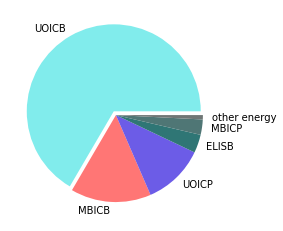

In [119]:
neg_CA_cons_df = CA_cons_df[CA_cons_df['Cons_Data'] < 0]
label = []
for i in range(5):
    label.append(neg_CA_cons_df.iloc[i]['MSN'])
label.append('other energy')

other_energy = abs(neg_CA_cons_df.iloc[5:len(neg_CA_cons_df)]['Cons_Data'].sum())
first_five = abs(neg_CA_cons_df.iloc[0:5]['Cons_Data']).values
pie_data = np.append(first_five,other_energy)
explodes = np.zeros(len(pie_data))
explodes[0] = 0.05
colors = ['#81ecec','#ff7675','#6c5ce7','#2f7675','#4f7675','#6f7675']

plt.pie(pie_data,explode=explodes,colors=colors,labels=label)
plt.title('CA energy consume piechart')
plt.show()

In [120]:
AZ_prod_df = pd.DataFrame(columns=['MSN', 'Prod_Data'])
AZ_cons_df = pd.DataFrame(columns=['MSN', 'Cons_Data'])
# CA's distribution in energy
for i in range(605):
    current_label = msn_label[i]
#     find current energy type's all samples
    current_AZ = AZ_seseds[AZ_seseds['MSN']==current_label]
#     CA energy produce amount
    prod_AZ = current_AZ[current_AZ['Data'] > 0]
    Cons_AZ = current_AZ[current_AZ['Data'] < 0]
    AZ_prod_df.loc[i] = dict(MSN=current_label, Prod_Data=prod_AZ['Data'].sum())
    AZ_cons_df.loc[i] = dict(MSN=current_label, Cons_Data=Cons_AZ['Data'].sum())

AZ_prod_df = AZ_prod_df.sort_values(by='Prod_Data', ascending = False)
AZ_cons_df = AZ_cons_df.sort_values(by='Cons_Data', ascending = True)

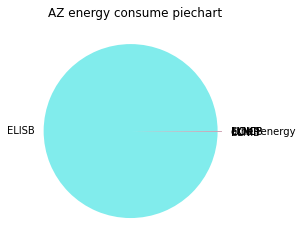

In [121]:
neg_AZ_cons_df = AZ_cons_df[AZ_cons_df['Cons_Data'] < 0]
label = []
for i in range(5):
    label.append(neg_AZ_cons_df.iloc[i]['MSN'])
label.append('other energy')

other_energy = abs(neg_AZ_cons_df.iloc[5:len(neg_AZ_cons_df)]['Cons_Data'].sum())
first_five = abs(neg_AZ_cons_df.iloc[0:5]['Cons_Data']).values
pie_data = np.append(first_five,other_energy)
explodes = np.zeros(len(pie_data))
explodes[0] = 0.05
colors = ['#81ecec','#ff7675','#6c5ce7','#2f7675','#4f7675','#6f7675']

plt.pie(pie_data,explode=explodes,colors=colors,labels=label)
plt.title('AZ energy consume piechart')
plt.show()

In [122]:
neg_AZ_cons_df

,MSN,Cons_Data
129,ELISB,-6.112650e+06
130,ELNIB,-5.478497e+03
131,ELNIP,-1.605655e+03
563,UOICB,-1.241821e+03
564,UOICP,-2.131882e+02
299,MBICB,-1.621030e+02
300,MBICP,-3.085912e+01
98,DFEIV,-5.900700e-01
0,ABICB,-5.396000e-02
1,ABICP,-1.069000e-02
